In [1]:
!pip install pandas

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [48]:
import pandas as pd
import numpy as np
import os
import matplotlib as plt
import matplotlib.pyplot as plt
import scipy.stats as stats
import requests
from bs4 import BeautifulSoup

In [7]:
dataset_directory = 'movie_data'
files_in_directory = os.listdir(dataset_directory)
csv_files = [file for file in files_in_directory if file.endswith('.csv')]
number_of_csv_files = len(csv_files)

print(f'There are {number_of_csv_files} CSV files in the dataset:')
for file in csv_files:
    print(file)

There are 4 CSV files in the dataset:
links.csv
movies.csv
ratings.csv
tags.csv


In [8]:
file_path = os.path.join(dataset_directory, 'movies.csv')


movies_df = pd.read_csv(file_path)

shape_of_movies = movies_df.shape

print(f'The shape of the "movies.csv" file is: {shape_of_movies}')

The shape of the "movies.csv" file is: (9742, 3)


In [9]:
file_path = os.path.join(dataset_directory, 'ratings.csv')

ratings_df = pd.read_csv(file_path)

shape_of_ratings = ratings_df.shape

print(f'The shape of the "ratings.csv" file is: {shape_of_ratings}')

The shape of the "ratings.csv" file is: (100836, 4)


In [10]:
file_path = os.path.join(dataset_directory, 'ratings.csv')

ratings_df = pd.read_csv(file_path)

unique_user_ids = ratings_df['userId'].nunique()

print(f'The number of unique "userId" in "ratings.csv" is: {unique_user_ids}')

The number of unique "userId" in "ratings.csv" is: 610


In [11]:
ratings_file_path = os.path.join(dataset_directory, 'ratings.csv')
movies_file_path = os.path.join(dataset_directory, 'movies.csv')

ratings_df = pd.read_csv(ratings_file_path)
movies_df = pd.read_csv(movies_file_path)

ratings_count = ratings_df.groupby('movieId')['rating'].count().reset_index()
ratings_count.columns = ['movieId', 'rating_count']

max_ratings_movie_id = ratings_count.loc[ratings_count['rating_count'].idxmax()]['movieId']

max_ratings_movie_title = movies_df[movies_df['movieId'] == max_ratings_movie_id]['title'].values[0]

print(f'The movie with the maximum number of user ratings is: {max_ratings_movie_title}')

The movie with the maximum number of user ratings is: Forrest Gump (1994)


In [12]:
movies_file_path = os.path.join(dataset_directory, 'movies.csv')
tags_file_path = os.path.join(dataset_directory, 'tags.csv')

movies_df = pd.read_csv(movies_file_path)
tags_df = pd.read_csv(tags_file_path)

matrix_movie_id = movies_df[movies_df['title'] == 'Matrix, The (1999)']['movieId'].values[0]

matrix_tags = tags_df[tags_df['movieId'] == matrix_movie_id]['tag'].unique()

print(f'The tags submitted by users for "Matrix, The (1999)" are:')
for tag in matrix_tags:
    print(tag)

The tags submitted by users for "Matrix, The (1999)" are:
martial arts
sci-fi
alternate universe
philosophy
post apocalyptic


In [18]:
ratings = [
    3, 3, 2.5, 4, 5, 4.5, 4.5, 5, 3.5, 4.5, 3.5, 4, 3.5, 4, 5, 5, 5, 3, 4, 4, 4, 4, 4, 4, 4, 3.5, 3.5, 4, 3, 4.5, 4.5, 3.5, 4.5, 5, 5, 4.5, 4, 4, 4, 5, 4, 4, 3, 5, 4, 4, 5, 4, 3, 3, 4, 3.5, 3, 2, 3, 5, 5, 3, 4, 5, 4, 5, 2, 5, 5, 3, 5, 3, 3.5, 5, 5, 4, 4, 4, 5, 3, 4.5, 5, 4.5, 4, 3.5, 5, 0.5, 5, 4, 4, 3.5, 4, 4, 4, 5, 3.5, 4, 4, 4, 4, 5, 3.5, 5, 4.5, 4, 4.5, 5, 4, 4, 3, 4, 0.5, 4, 5, 5, 5, 2.5, 1, 3, 4, 5, 5, 4, 3, 1, 3.5, 3.5, 4, 5, 5, 4, 3, 4, 4.5, 3.5, 3, 3.5, 4, 4, 3, 4, 4, 3, 5, 4, 5, 2.5, 5, 3, 3.5, 4, 0.5, 3, 2.5, 5, 3, 5, 5, 2, 3.5, 2.5, 3.5, 4.5, 4, 5, 3.5, 5, 4, 5, 4, 3, 5, 5, 5, 3, 3, 2.5, 5, 4, 5, 4, 5, 5, 5, 4.5, 4, 5, 3.5, 4, 5, 3, 3, 4, 4.5, 5, 4, 4, 3, 4.5, 3, 5, 3, 4, 5, 4, 3, 4, 4.5, 4, 5, 4, 5, 5, 3, 4.5, 5, 5, 3, 5, 4.5, 3, 5, 3.5, 3.5, 4, 3, 3, 5
]

mean_rating = sum(ratings) / len(ratings)
print(len(ratings))
print(f'The mean rating is: {mean_rating:.2f}')

224
The mean rating is: 3.97


In [19]:
movies_df = pd.read_csv(movies_file_path)
ratings_df = pd.read_csv(ratings_file_path)

terminator_movie_id = movies_df[movies_df['title'] == 'Terminator 2: Judgment Day (1991)']['movieId'].values[0]

print(terminator_movie_id)

terminator_ratings = ratings_df[ratings_df['movieId'] == terminator_movie_id]['rating'].tolist()

print(terminator_ratings)
print(len(terminator_ratings))

mean_rating = sum(terminator_ratings) / len(terminator_ratings)

print(f'The mean rating for "Terminator 2: Judgment Day (1991)" is: {mean_rating:.2f}')

589
[3.0, 3.0, 2.5, 4.0, 5.0, 4.5, 4.5, 5.0, 3.5, 4.5, 3.5, 4.0, 3.5, 4.0, 5.0, 5.0, 5.0, 3.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 3.5, 3.5, 4.0, 3.0, 4.5, 4.5, 3.5, 4.5, 5.0, 5.0, 4.5, 4.0, 4.0, 4.0, 5.0, 4.0, 4.0, 3.0, 5.0, 4.0, 4.0, 5.0, 4.0, 3.0, 3.0, 4.0, 3.5, 3.0, 2.0, 3.0, 5.0, 5.0, 3.0, 4.0, 5.0, 4.0, 5.0, 2.0, 5.0, 5.0, 3.0, 5.0, 3.0, 3.5, 5.0, 5.0, 4.0, 4.0, 4.0, 5.0, 3.0, 4.5, 5.0, 4.5, 4.0, 3.5, 5.0, 0.5, 5.0, 4.0, 4.0, 3.5, 4.0, 4.0, 4.0, 5.0, 3.5, 4.0, 4.0, 4.0, 4.0, 5.0, 3.5, 5.0, 4.5, 4.0, 4.5, 5.0, 4.0, 4.0, 3.0, 4.0, 0.5, 4.0, 5.0, 5.0, 5.0, 2.5, 1.0, 3.0, 4.0, 5.0, 5.0, 4.0, 3.0, 1.0, 3.5, 3.5, 4.0, 5.0, 5.0, 4.0, 3.0, 4.0, 4.5, 3.5, 3.0, 3.5, 4.0, 4.0, 3.0, 4.0, 4.0, 3.0, 5.0, 4.0, 5.0, 2.5, 5.0, 3.0, 3.5, 4.0, 0.5, 3.0, 2.5, 5.0, 3.0, 5.0, 5.0, 2.0, 3.5, 2.5, 3.5, 4.5, 4.0, 5.0, 3.5, 5.0, 4.0, 5.0, 4.0, 3.0, 5.0, 5.0, 5.0, 3.0, 3.0, 2.5, 5.0, 4.0, 5.0, 4.0, 5.0, 5.0, 5.0, 4.5, 4.0, 5.0, 3.5, 4.0, 5.0, 3.0, 3.0, 4.0, 4.5, 5.0, 4.0, 4.0, 3.0, 4.5, 3.0, 5.0, 3.0, 4.0, 

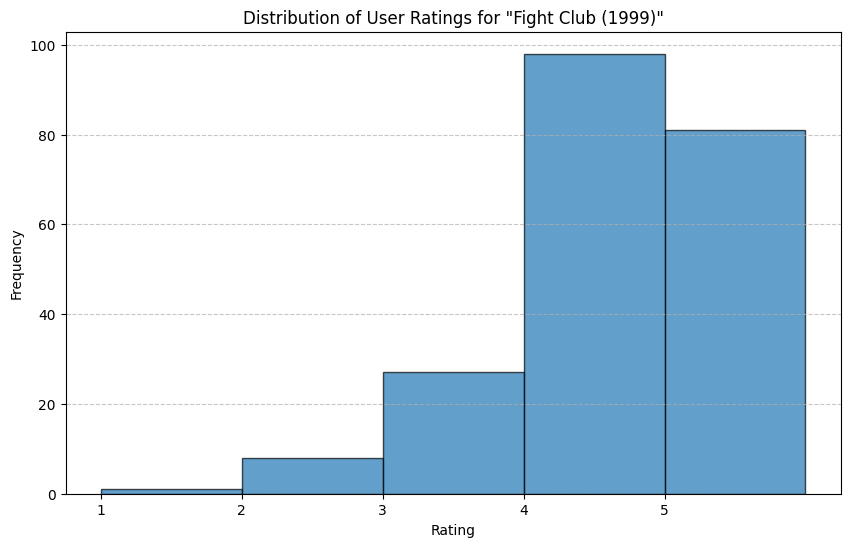

Skewness: -1.85
Kurtosis: 4.45
The distribution type is: Left Skewed Distribution


In [26]:
fight_club_movie_id = movies_df[movies_df['title'] == 'Fight Club (1999)']['movieId'].values[0]


fight_club_ratings = ratings_df[ratings_df['movieId'] == fight_club_movie_id]['rating']
plt.figure(figsize=(10, 6))
plt.hist(fight_club_ratings, bins=range(1, 7), edgecolor='black', alpha=0.7)
plt.title('Distribution of User Ratings for "Fight Club (1999)"')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.xticks(range(1, 6))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


skewness = stats.skew(fight_club_ratings)
kurtosis = stats.kurtosis(fight_club_ratings)

print(f'Skewness: {skewness:.2f}')
print(f'Kurtosis: {kurtosis:.2f}')

# Interpretation
if skewness > 0:
    distribution = 'Right Skewed Distribution'
elif skewness < 0:
    distribution = 'Left Skewed Distribution'
else:
    distribution = 'Normal Distribution'

print(f'The distribution type is: {distribution}')

In [33]:
movies_df = pd.read_csv(movies_file_path)
ratings_df = pd.read_csv(ratings_file_path)

grouped_ratings = ratings_df.groupby('movieId').agg(
    rating_count=('rating', 'count'),
    average_rating=('rating', 'mean')
).reset_index()

merged_df = pd.merge(movies_df, grouped_ratings, on='movieId', how='inner')

filtered_df = merged_df[merged_df['rating_count'] > 50]

filtered_df.head(50)

,movieId,title,genres,rating_count,average_rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
5,6,Heat (1995),Action|Crime|Thriller,102,3.946078
6,7,Sabrina (1995),Comedy|Romance,54,3.185185
9,10,GoldenEye (1995),Action|Adventure|Thriller,132,3.496212
10,11,"American President, The (1995)",Comedy|Drama|Romance,70,3.671429
15,16,Casino (1995),Crime|Drama,82,3.926829
16,17,Sense and Sensibility (1995),Drama|Romance,67,3.776119
18,19,Ace Ventura: When Nature Calls (1995),Comedy,88,2.727273


In [34]:
sorted_df = filtered_df.sort_values(by='rating_count', ascending=False)
sorted_df

,movieId,title,genres,rating_count,average_rating
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,329,4.164134
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,317,4.429022
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307,4.197068
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279,4.161290
1938,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278,4.192446
...,...,...,...,...,...
3147,4239,Blow (2001),Crime|Drama,51,3.813725
3490,4776,Training Day (2001),Crime|Drama|Thriller,51,3.794118
3539,4848,Mulholland Drive (2001),Crime|Drama|Film-Noir|Mystery|Thriller,51,3.843137
118,145,Bad Boys (1995),Action|Comedy|Crime|Drama|Thriller,51,3.245098


In [40]:
"Top 5 Popular Movies Based on Number of User Ratings:"
most_popular_movie = sorted_df.iloc[0:5]
most_popular_movie

,movieId,title,genres,rating_count,average_rating
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,329,4.164134
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,317,4.429022
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307,4.197068
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279,4.161290
1938,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278,4.192446


In [47]:

sci_fi_movies = sorted_df[sorted_df['genres'].str.contains('Sci-Fi')]
third_most_popular_sci_fi = sci_fi_movies.iloc[2]
third_most_popular_sci_fi['title']



'Jurassic Park (1993)'

In [62]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import numpy as np

def scrapper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0"*n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"
    print(f"Accessing URL: {URL}")  # Debug print
    
    request_header = {'Content-Type': 'text/html; charset=UTF-8', 
                      'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0', 
                      'Accept-Encoding': 'gzip, deflate, br'}
    
    response = requests.get(URL, headers=request_header)
    print(f"Response status code: {response.status_code}")  # Debug print
    
    soup = BeautifulSoup(response.text, 'html.parser')
    imdb_rating = soup.find('span', attrs={'class': 'sc-eb51e184-1 ljxVSS'})
    
    if imdb_rating:
        print(f"Found rating: {imdb_rating.text}")  
    else:
        print("Rating not found")
    
    return imdb_rating.text if imdb_rating else np.nan


# filtered_df = pd.read_csv('filtered_movies.csv') 


links_df = pd.read_csv('./movie_data/links.csv') 

merged_df = pd.merge(filtered_df, links_df, on='movieId')


movie_imdb_ratings = {}

for index, row in merged_df.iterrows():
    imdb_id = row['imdbId']
    title = row['title']
    rating = scrapper(imdb_id)
    movie_imdb_ratings[title] = rating

ratings_df = pd.DataFrame(list(movie_imdb_ratings.items()), columns=['Title', 'IMDb Rating'])


ratings_df.to_csv('movie_imdb_ratings.csv', index=False)

print("IMDb ratings have been saved to 'movie_imdb_ratings.csv'.")


Accessing URL: https://www.imdb.com/title/tt0114709/
Response status code: 200
Found rating: 8.3
Accessing URL: https://www.imdb.com/title/tt0113497/
Response status code: 200
Found rating: 7.1
Accessing URL: https://www.imdb.com/title/tt0113228/
Response status code: 200
Found rating: 6.7
Accessing URL: https://www.imdb.com/title/tt0113277/
Response status code: 200
Found rating: 8.3
Accessing URL: https://www.imdb.com/title/tt0114319/
Response status code: 200
Found rating: 6.3
Accessing URL: https://www.imdb.com/title/tt0113189/
Response status code: 200
Found rating: 7.2
Accessing URL: https://www.imdb.com/title/tt0112346/
Response status code: 200
Found rating: 6.8
Accessing URL: https://www.imdb.com/title/tt0112641/
Response status code: 200
Found rating: 8.2
Accessing URL: https://www.imdb.com/title/tt0114388/
Response status code: 200
Found rating: 7.7
Accessing URL: https://www.imdb.com/title/tt0112281/
Response status code: 200
Found rating: 6.4
Accessing URL: https://www.imd

In [68]:
ratings_df = pd.read_csv('movie_imdb_ratings.csv')

merged_df = pd.merge(filtered_df, links_df, on='movieId')

merged_ratings_df = pd.merge(merged_df, ratings_df, left_on='title', right_on='Title')

highest_rated_movie = merged_ratings_df.loc[merged_ratings_df['IMDb Rating'].astype(float).idxmax()]

highest_rated_movieId = highest_rated_movie['movieId']
highest_rated__movie_name = highest_rated_movie['title']

print(f"The Sci-Fi movie with the highest IMDb rating is '{highest_rated__movie_name}' with movieId: {highest_rated_movieId}")



The Sci-Fi movie with the highest IMDb rating is 'Shawshank Redemption, The (1994)' with movieId: 318


In [66]:
sci_fi_movies = merged_ratings_df[merged_ratings_df['genres'].str.contains('Sci-Fi')]
highest_rated_sci_fi_movie = sci_fi_movies.loc[sci_fi_movies['IMDb Rating'].astype(float).idxmax()]

highest_rated_sci_fi_movieId = highest_rated_sci_fi_movie['movieId']
highest_rated_sci_fi_movie_name = highest_rated_sci_fi_movie['title']

print(f"The Sci-Fi movie with the highest IMDb rating is '{highest_rated_sci_fi_movie_name}' with movieId: {highest_rated_sci_fi_movieId}")

The Sci-Fi movie with the highest IMDb rating is 'Inception (2010)' with movieId: 79132
